### IMPORTS 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
RANDOM_SEED = 42
DATA_PATH = "data/"
DATA_FILE = "processed_traffic.parquet"
data = pd.read_parquet( DATA_PATH+ DATA_FILE) 
X, y = data.drop(columns=["Attack Name", "Label"]), data["Label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

### Feature scaling

Due to KNN being a model that depends on distance, we scale the features so that all variables contribute equally to teh distance calculations and no single feature dominates the distance metric chosen.

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Hyperparameter grid

The range from 3 to 30 was chosen in order to  avoid extremely low values and large values and the risk of over and underfitting  while keeping the search computationally reasonable 

both euclidean and manhattan distance are considered, Manhattan distance may be approproate for high-dimensional data





In [26]:
param_grid = {
    "n_neighbors" : range(3, 30, 3),
    "weights": ["uniform", "distance"],
    'metric': ['euclidean', 'manhattan']
}

In [27]:
knn = KNeighborsClassifier()

grid = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    return_train_score=True
)

grid.fit(X_train_scaled, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'metric': ['euclidean', 'manhattan'], 'n_neighbors': range(3, 30, 3), 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_neighbors,3


In [28]:
print("\nBest KNN Parameters:", grid.best_params_)
best_knn = grid.best_estimator_


Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
y_pred = best_knn.predict(X_test_scaled)
print("\nClassification Report:\n", classification_report(y_test,y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      6476
           1       0.98      0.96      0.97      5960

    accuracy                           0.97     12436
   macro avg       0.97      0.97      0.97     12436
weighted avg       0.97      0.97      0.97     12436



### Plot Accuracy vs K

We use the Manhattan distance and the weighted average scheme to visualize the efffect of the K values in the accuracy of the algorithm

In [30]:
results = pd.DataFrame(grid.cv_results_)

subset = results[(results["param_metric"] == "manhattan") &
                 (results["param_weights"] == "distance")]


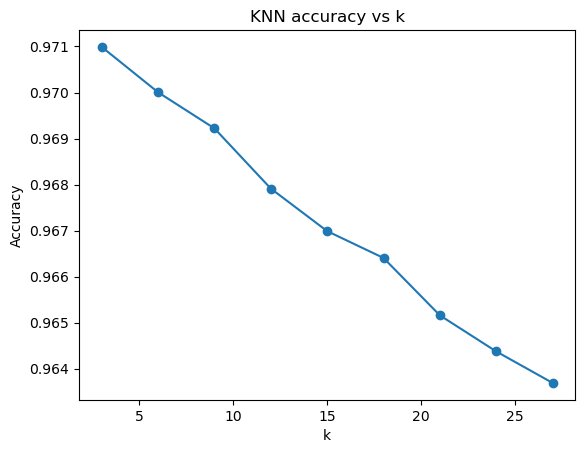

In [ ]:
plt.plot(subset["param_n_neighbors"], subset["mean_test_score"], marker='o')
plt.title("KNN accuracy vs k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()